In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
"""
Use the information about the health insurance company's clients (available here) and create
a regression model to predict the costs of the insured's medical expenses.
"""

"\nUse the information about the health insurance company's clients (available here) and create\na regression model to predict the costs of the insured's medical expenses.\n"

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()   # object --> strings/lists/tuples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

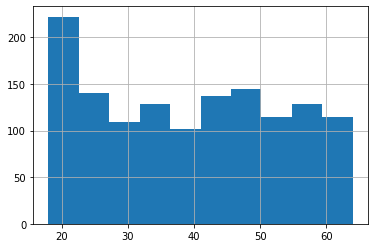

In [6]:
data.age.hist()

In [7]:
data.age.value_counts(normalize=True)

18    0.051570
19    0.050822
50    0.021674
51    0.021674
47    0.021674
46    0.021674
45    0.021674
20    0.021674
48    0.021674
52    0.021674
22    0.020927
49    0.020927
54    0.020927
53    0.020927
21    0.020927
26    0.020927
24    0.020927
25    0.020927
28    0.020927
27    0.020927
23    0.020927
43    0.020179
29    0.020179
30    0.020179
41    0.020179
42    0.020179
44    0.020179
31    0.020179
40    0.020179
32    0.019432
33    0.019432
56    0.019432
34    0.019432
55    0.019432
57    0.019432
37    0.018685
59    0.018685
58    0.018685
36    0.018685
38    0.018685
35    0.018685
39    0.018685
61    0.017190
60    0.017190
63    0.017190
62    0.017190
64    0.016442
Name: age, dtype: float64

In [8]:
def class_bar(data, sign, x=8, y=5):
    """
    The function is used for drawing the categorial distribution  
    """
    df = data.copy()
    df_row = (df[sign].value_counts(normalize = True) * 100).reset_index()
 
 
    plt.gcf().set_size_inches(x, y)
    plt.rcParams.update({'font.size': 11})
    sns.barplot(x = 'index', y = sign, data = df_row, edgecolor='.1', saturation = 1)
    for index, row_text in df_row.iterrows():
            plt.text(index, row_text[sign] * 1.01, '{}%'.format(round(row_text[sign], 1)), color = 'black', ha = 'center')
 
 
    plt.ylim([0, 250])
    plt.grid(axis = 'y')
    plt.xlabel('Class')
    plt.ylabel('Part of class (%)')
    plt.title(f'Diagram of class balance: {sign}')
    plt.show()

In [9]:
data.info()   # object --> strings/lists/tuples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


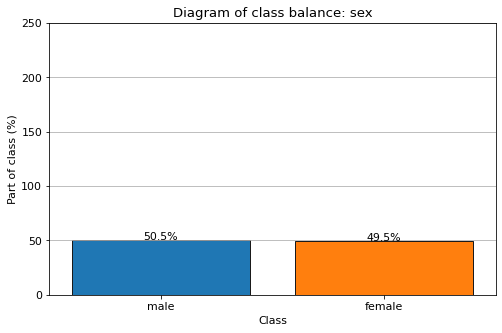

In [10]:
class_bar(data, 'sex')

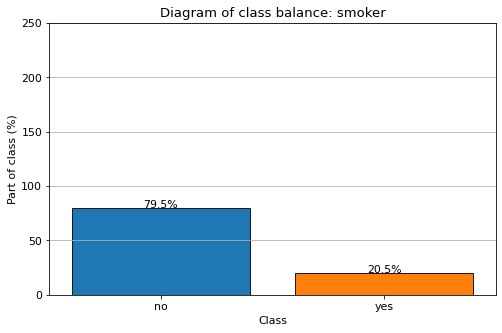

In [11]:
class_bar(data, 'smoker') 

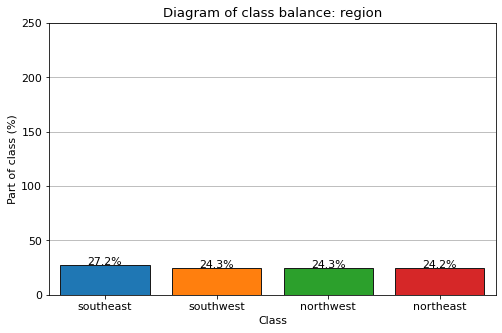

In [12]:
class_bar(data, 'region') 

In [13]:
features = data.drop(columns= ['charges'])
# we have the target variable - exactly the column we want to predict, 
# and the features --> is the list of columns we have to use for teaching the model
target = data['charges'] 
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size = 0.2, train_size=0.8, random_state=999)

In [14]:
category_list = ['sex', 'region','smoker'] # is the caterogy
model = CatBoostRegressor(iterations=1000, verbose=100)

In [15]:
model.fit(features_train, target_train,cat_features=category_list)

Learning rate set to 0.041383
0:	learn: 11724.3475340	total: 57.4ms	remaining: 57.4s
100:	learn: 4254.8374539	total: 162ms	remaining: 1.44s
200:	learn: 4023.0743859	total: 294ms	remaining: 1.17s
300:	learn: 3837.2057071	total: 413ms	remaining: 958ms
400:	learn: 3674.7259807	total: 527ms	remaining: 788ms
500:	learn: 3545.7253038	total: 656ms	remaining: 653ms
600:	learn: 3421.2593889	total: 772ms	remaining: 512ms
700:	learn: 3309.2298442	total: 885ms	remaining: 378ms
800:	learn: 3199.4548759	total: 1s	remaining: 250ms
900:	learn: 3091.0058338	total: 1.14s	remaining: 125ms
999:	learn: 2994.0050487	total: 1.26s	remaining: 0us


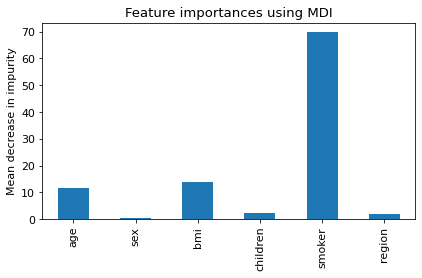

In [16]:
# gradient boosting - a lot of trees --> checking params according to previous tree
# easy algorrithm
# here we are checking useful and useless parametrs for the model in this case we can drop sex, children and region
# params, because the main model 
importances = model.feature_importances_ # 
feature_names = features.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
predictions = model.predict(features_test) #analogy with school

<div class="iy iz ja jb jc"><h2 id="d44a" class="tj tk jf bn tl nk tm nl nn no tn np nr ld to ns nu lh tp nv nx ll tq ny oa tr gb" data-selectable-paragraph="">Definitions</h2><p id="0be7" class="pw-post-body-paragraph ku kv jf kw b kx ts kg kz la tt kj lc ld tu lf lg lh tv lj lk ll tw ln lo lp iy gb" data-selectable-paragraph=""><strong class="kw jg">Mean Absolute Error (MAE): </strong>MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.</p><figure class="ty tz ua ub gy uc gm gn paragraph-image"><div class="gm gn tx"><img alt="" class="cf of ud" src="https://miro.medium.com/max/315/1*OVlFLnMwHDx08PHzqlBDag.gif" width="315" height="90" loading="lazy" role="presentation"></div></figure><p id="d504" class="pw-post-body-paragraph ku kv jf kw b kx ky kg kz la lb kj lc ld le lf lg lh li lj lk ll lm ln lo lp iy gb" data-selectable-paragraph=""><em class="ue">If the absolute value is not taken (the signs of the errors are not removed), the average error becomes the Mean Bias Error (MBE) and is usually intended to measure average model bias. MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.</em></p><p id="1d7f" class="pw-post-body-paragraph ku kv jf kw b kx ky kg kz la lb kj lc ld le lf lg lh li lj lk ll lm ln lo lp iy gb" data-selectable-paragraph=""><strong class="kw jg">Root mean squared error (RMSE)</strong>: RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.</p><figure class="ty tz ua ub gy uc gm gn paragraph-image"><div class="gm gn uf"><img alt="" class="cf of ud" src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" width="327" height="90" loading="lazy" role="presentation"></div></figure></div>

In [18]:
print("The mean absolute error: ", mean_absolute_error(target_test, predictions)) #we got the mae metric 
# comparing target_test comparing with predictions of the model
print("The mean: ", target.mean())  # the average value of all targets
print("Median:", target.median())  # m
print("Checking the rmse metric(with root)", mean_squared_error(target_test, predictions)**0.5)

The mean absolute error:  2662.736849227891
The mean:  13270.422265141257
Median: 9382.033
Checking the rmse metric(with root) 4790.767841557103


## Based on this data we can make the conclusion that our model predicting not the random values, and it really found  different connections between params

In [30]:
features_test['predictions'] = predictions.astype(int)

In [38]:
features_test.info()
features_test.sort_values('predictions')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1276 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          268 non-null    int64  
 1   sex          268 non-null    object 
 2   bmi          268 non-null    float64
 3   children     268 non-null    int64  
 4   smoker       268 non-null    object 
 5   region       268 non-null    object 
 6   predictions  268 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 16.8+ KB


,age,sex,bmi,children,smoker,region,predictions
943,19,male,22.610,0,no,northwest,1282
1251,19,male,19.800,0,no,southwest,1335
248,19,male,20.900,1,no,southwest,1488
899,19,female,22.515,0,no,northwest,1594
1212,18,male,21.470,0,no,northeast,1619
...,...,...,...,...,...,...,...
665,43,male,38.060,2,yes,southeast,45747
1031,55,female,35.200,0,yes,southeast,46023
109,63,male,35.090,0,yes,southeast,46447
951,51,male,42.900,2,yes,southeast,47242
